# Name - Dhruvit Jain

# The Sparks Foundation Internship 

# GRIP January 2021 

# Task #2 -  Prediction using Unsupervised ML


In [128]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [129]:
#read the csv file with scores and show the shape of this dataframe
df = pd.read_csv('Iris.csv')
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [130]:
#Since the labels are text, i.e. name of species are strings, it's easier to assign an integer to each name

labels = df.iloc [:,5].values.tolist() #tolist() is used to iterate through values in labels
labels1 = []
for label in labels:
    if label == 'Iris-setosa':
        labels1.append(0)
    elif label == 'Iris-versicolor':
        labels1.append(1)
    else:
        labels1.append (2)
labels1 = np.array(labels1)        
print (f"Labels = {labels1}")

features = df.iloc [:,1:5].values #0th column is of no use as it is ID
x=features

Labels = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**Now we will implement The elbow method on the Iris dataset. The elbow method allows us to pick the optimum amount of clusters for classification. Although we already know the answer is 3 it is still interesting to run.**

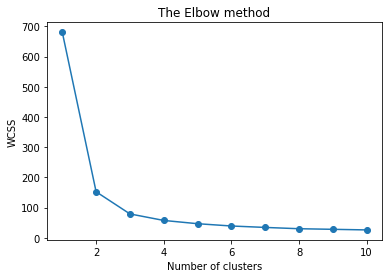

In [131]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss,'-o')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

We can clearly see why it is called **'The elbow method'** from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration or the point after which the distortion/inertia starts decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is **3**. Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.

In [132]:
#Applying kmeans to the dataset / Creating the kmeans classifier with n_clusters=3

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_pred = kmeans.fit_predict(features)
print (f"Predicted values are: {y_pred}")

Predicted values are: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


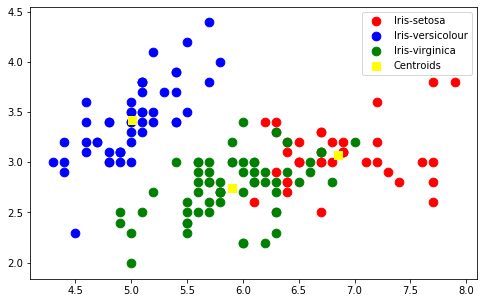

In [133]:
# Visualising the clusters
# print (x)
plt.figure(figsize=(8,5))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], 
            s = 75, c = 'red', label = 'Iris-setosa',marker='o')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], 
            s = 75, c = 'blue', label = 'Iris-versicolour',marker='o')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],
            s = 75, c = 'green', label = 'Iris-virginica',marker='o')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids',marker='s')

plt.legend(loc='best')